In [1]:
import numpy as np
np.random.seed(2024)

In [2]:
tmp_q = np.random.rand(10, 32)

In [3]:
def norm1d(data, axis):
    """Normalize data to have zero mean and unit standard deviation along the specified axis."""
    return (data - data.mean(axis=axis, keepdims=True)) / data.std(axis=axis, keepdims=True)

In [4]:
tmp_q = norm1d(tmp_q, -1)
tmp_q.mean(1, keepdims=True), tmp_q.std(1, keepdims=True)

(array([[ 5.20417043e-17],
        [ 4.85722573e-17],
        [ 9.71445147e-17],
        [ 2.91433544e-16],
        [ 1.87350135e-16],
        [ 1.94289029e-16],
        [-2.42861287e-16],
        [ 1.11022302e-16],
        [ 1.94289029e-16],
        [-1.38777878e-17]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

In [5]:
from metric import cross_entropy

labels = np.array([0, 2])
preds = np.array([[0.3, 0.6, 0.1], [0.2, 0.3, 0.5]])

cross_entropy(labels, preds)

0.9485599924429406

In [6]:
from attention import scale_dot_product
from draw import show_attention

query = np.random.rand(10, 32)
key = np.random.rand(10, 32)
value = np.random.rand(10, 32)

att, wei = scale_dot_product(query, key, value)

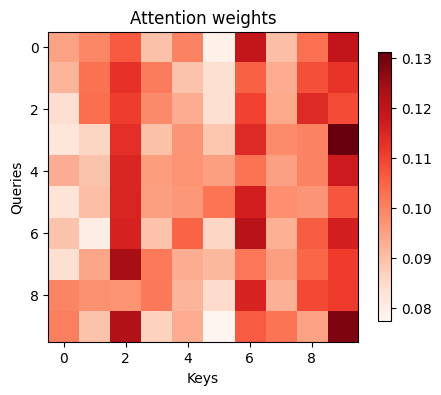

In [7]:
show_attention(wei)

In [8]:
wei.sum(axis=-1, keepdims=True)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [18]:
from attention import nadaraya_watson

att, wei = nadaraya_watson(query, key, value, "Gaussian")

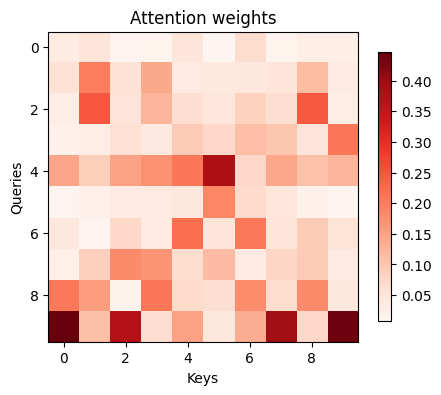

In [19]:
show_attention(wei)

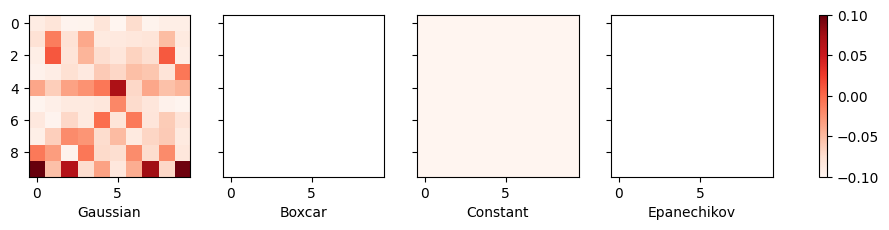

In [20]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(
    1, 4, 
    sharey=True, 
    figsize=(12, 3)
)
names = ('Gaussian', 'Boxcar', 'Constant', 'Epanechikov')
for name, ax in zip(names, axes):
    # 调用 nadaraya_watson 函数，计算预测值和注意力权重
    y_hat, attention_w = nadaraya_watson(
        query, key, value, 
        name
    )

    pcm = ax.imshow(
        attention_w, 
        cmap='Reds'
    )

    # 设置子图的x轴标签为名称
    ax.set_xlabel(name)

fig.colorbar(pcm, ax=axes, shrink=0.7)
plt.show()